# Health Care Analysis 

### DATA PRE-PROCESSING

Importing Dependencies

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [424]:
df_health = pd.read_csv('healthcare_dataset.csv')
df_health.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02-02-2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07-10-2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18-12-2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09-10-2022,Penicillin,Abnormal


Data CLeaning

In [425]:
df_health.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [426]:
df_health.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [427]:
print(df_health['Billing Amount'].dtype) 
print(df_health['Billing Amount'].describe()) 

float64
count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224655
50%      25538.069380
75%      37820.508432
max      52764.276740
Name: Billing Amount, dtype: float64


In [428]:
print(df_health['Gender'].unique())  
print(df_health['Blood Type'].unique()) 

['Male' 'Female']
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']


In [429]:
from datetime import datetime

df_health['Date of Admission'] = pd.to_datetime(df_health['Date of Admission'], errors='coerce')
print(df_health['Date of Admission'].dtype) 

df_health['Discharge Date'] = pd.to_datetime(df_health['Discharge Date'], errors='coerce')
print(df_health['Discharge Date'].dtype) 

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\2925009878.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_health['Date of Admission'] = pd.to_datetime(df_health['Date of Admission'], errors='coerce')


datetime64[ns]
datetime64[ns]


In [430]:
df_health['Stay Duration'] = (df_health['Discharge Date'] - df_health['Date of Admission']).dt.days
df_health.dropna(subset=['Discharge Date'], inplace=True)

In [431]:
df_health.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Stay Duration                float64
dtype: object

In [432]:
df_health.drop_duplicates(inplace = True)

In [433]:
df_health.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Stay Duration
count,21483.000000,21483,21483.000000,21483.000000,21483,21483.000000
mean,51.621887,2021-10-31 22:35:20.485965568,25638.828126,301.002281,2021-11-16 06:55:27.021365504,15.347298
min,13.000000,2019-05-08 00:00:00,-1660.009373,101.000000,2019-01-06 00:00:00,-322.000000
25%,35.000000,2020-07-28 00:00:00,13481.807680,202.000000,2020-08-08 00:00:00,-88.000000
50%,52.000000,2021-11-02 00:00:00,25721.518080,302.000000,2021-11-09 00:00:00,16.000000
75%,68.000000,2023-02-06 00:00:00,37778.010635,400.000000,2023-03-03 00:00:00,118.000000
max,88.000000,2024-05-07 00:00:00,52764.276740,500.000000,2024-12-05 00:00:00,354.000000
std,19.537740,NaN,14145.796430,115.354457,NaN,143.249211


Reducing the size of Data

<Figure size 640x480 with 0 Axes>

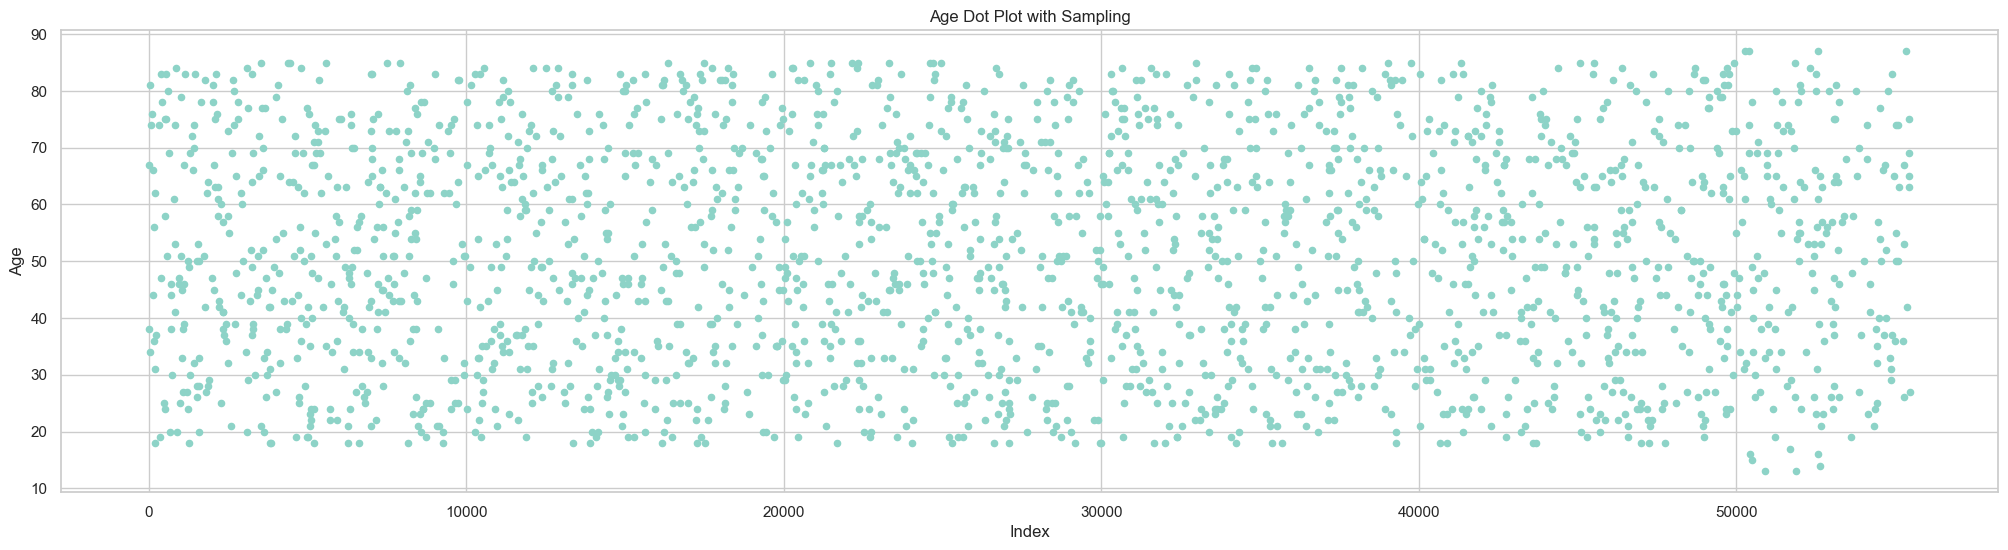

In [434]:
sampled_df = df_health.sample(frac=0.1, random_state=1)  # Adjust the fraction as needed

sampled_df.reset_index().plot(kind='scatter', x='index', y='Age', figsize=(25, 6))

plt.title('Age Dot Plot with Sampling')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

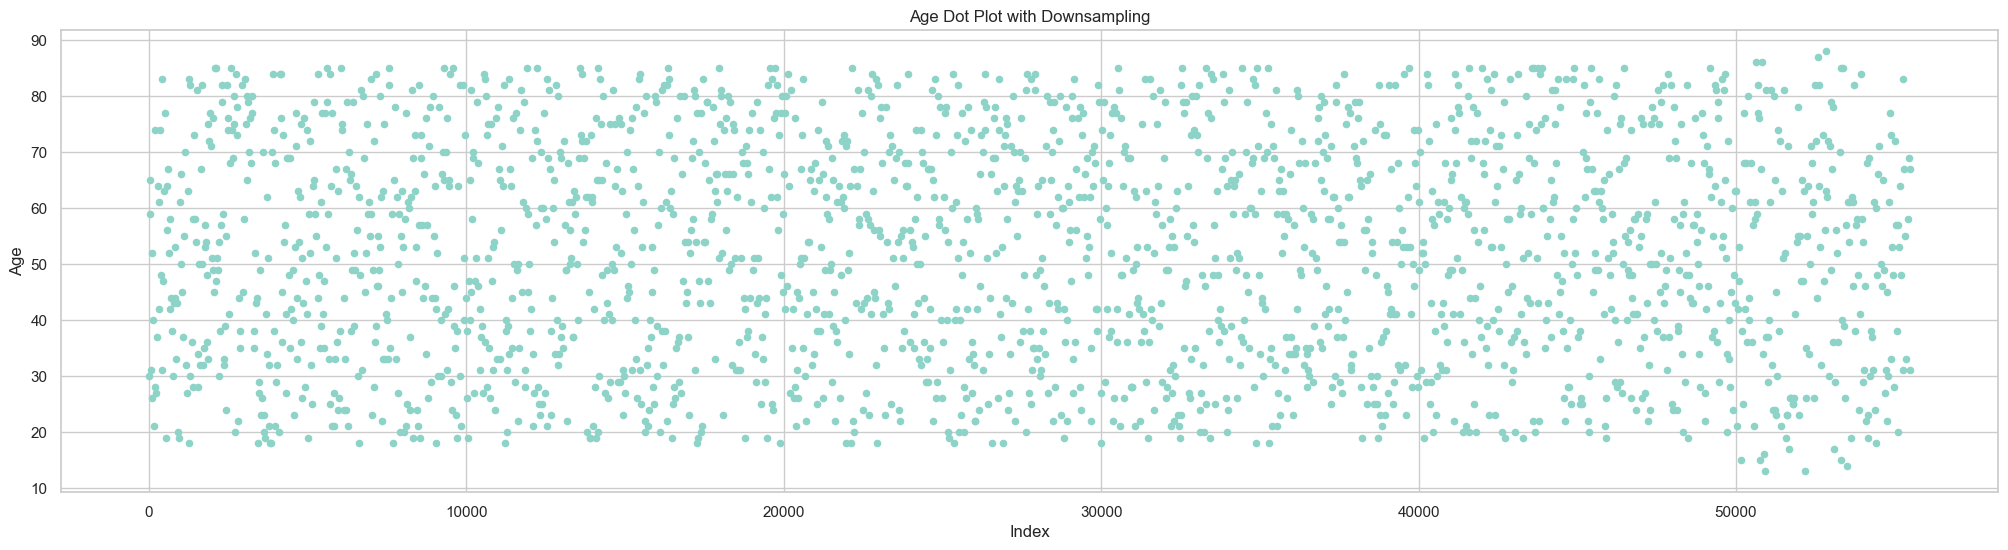

In [435]:
downsampled_df = df_health.iloc[::10, :]  

downsampled_df.reset_index().plot(kind='scatter', x='index', y='Age', figsize=(25, 6))

plt.title('Age Dot Plot with Downsampling')
plt.xlabel('Index')
plt.ylabel('Age')

plt.show()

Feature Engineering

In [436]:
from datetime import datetime

date_format = "%d-%m-%Y"

try:
    df_health['Date of Admission'] = pd.to_datetime(df_health['Date of Admission'], format=date_format)
    print(df_health['Date of Admission'])
except ValueError:
    print("Incorrect format. Date string does not match the expected format.")

try:
    df_health['Discharge Date'] = pd.to_datetime(df_health['Discharge Date'], format=date_format)
    print(df_health['Discharge Date'])
except ValueError:
    print("Incorrect format. Date string does not match the expected format.")


0       2024-01-31
2       2022-09-22
4       2022-09-19
7       2021-12-28
11      2023-08-13
           ...    
55489   2019-06-25
55492   2020-12-06
55494   2023-12-11
55496   2020-01-23
55497   2020-07-13
Name: Date of Admission, Length: 21483, dtype: datetime64[ns]
0       2024-02-02
2       2022-07-10
4       2022-09-10
7       2022-07-01
11      2023-05-09
           ...    
55489   2019-09-07
55492   2020-12-12
55494   2024-04-01
55496   2020-01-02
55497   2020-10-08
Name: Discharge Date, Length: 21483, dtype: datetime64[ns]


In [437]:
df_health['Date of Admission'] = pd.to_datetime(df_health['Date of Admission'])
df_health['Discharge Date'] = pd.to_datetime(df_health['Discharge Date'])

# Data Visualization

<Figure size 640x480 with 0 Axes>

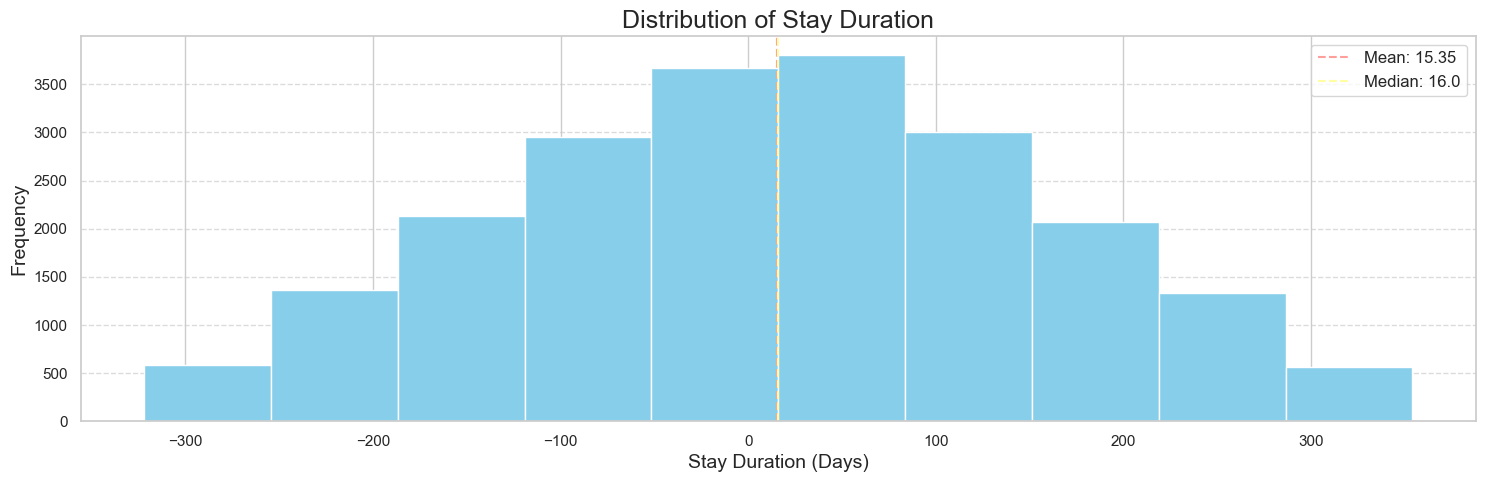

In [469]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(18, 5))

plt.hist(df_health['Stay Duration'], bins=10, color='skyblue')
plt.title('Distribution of Stay Duration', fontsize=18)
plt.xlabel('Stay Duration (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

mean_duration = df_health['Stay Duration'].mean()
median_duration = df_health['Stay Duration'].median()
plt.axvline(mean_duration, color='r', linestyle='--', linewidth=1.5, label=f'Mean: {mean_duration:.2f}')
plt.axvline(median_duration, color='y', linestyle='--', linewidth=1.5, label=f'Median: {median_duration}')

plt.legend(fontsize=12)
plt.savefig("Distribution of Stay Duration.png")
plt.show()

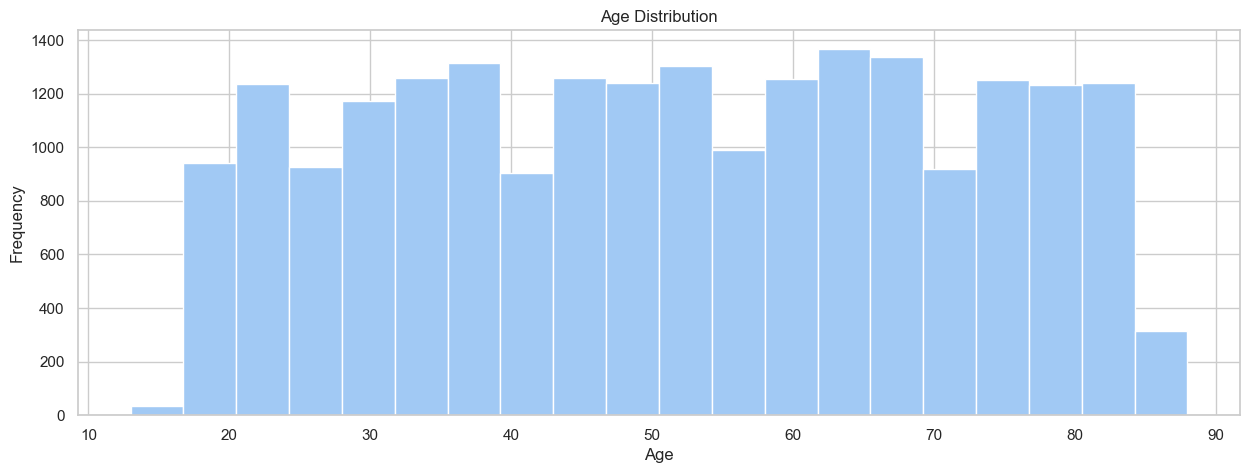

In [470]:
plt.figure(figsize=(15, 5))
plt.hist(df_health['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.savefig("Age Distribution.png")

<Figure size 640x480 with 0 Axes>

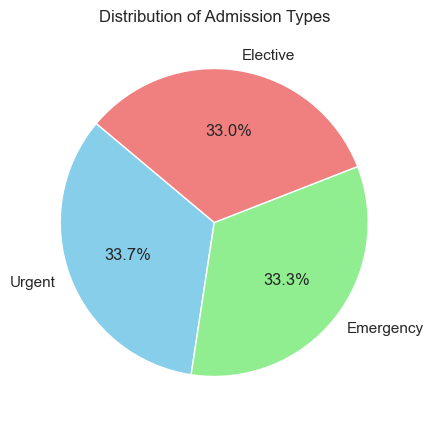

In [440]:
admission_counts = df_health['Admission Type'].value_counts()

plt.figure(figsize=(5, 5))  # Adjust figure size as needed
plt.pie(admission_counts, labels=admission_counts.index, colors=['skyblue', 'lightgreen', 'lightcoral'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Admission Types')
plt.show()
plt.savefig("Distribution of Admission Types.png")

<Figure size 640x480 with 0 Axes>

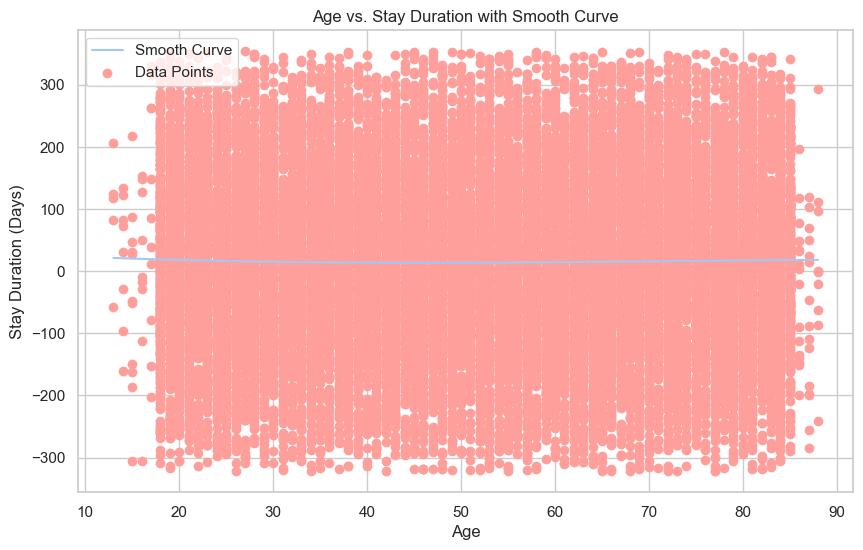

In [471]:
sns.set(style="whitegrid", palette="pastel")

df_health_sorted = df_health.sort_values(by='Age')

coefficients = np.polyfit(df_health_sorted['Age'], df_health_sorted['Stay Duration'], 3)
polynomial = np.poly1d(coefficients)

x_smooth = np.linspace(df_health_sorted['Age'].min(), df_health_sorted['Age'].max(), 100)
y_smooth = polynomial(x_smooth)

plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='b', label='Smooth Curve')
plt.scatter(df_health_sorted['Age'], df_health_sorted['Stay Duration'], marker='o', color='r', label='Data Points')
plt.title('Age vs. Stay Duration with Smooth Curve')
plt.xlabel('Age')
plt.ylabel('Stay Duration (Days)')
plt.legend()
plt.grid(True) 
plt.show()

plt.savefig("Age vs. Stay Duration with Smooth Curve.png")

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 640x480 with 0 Axes>

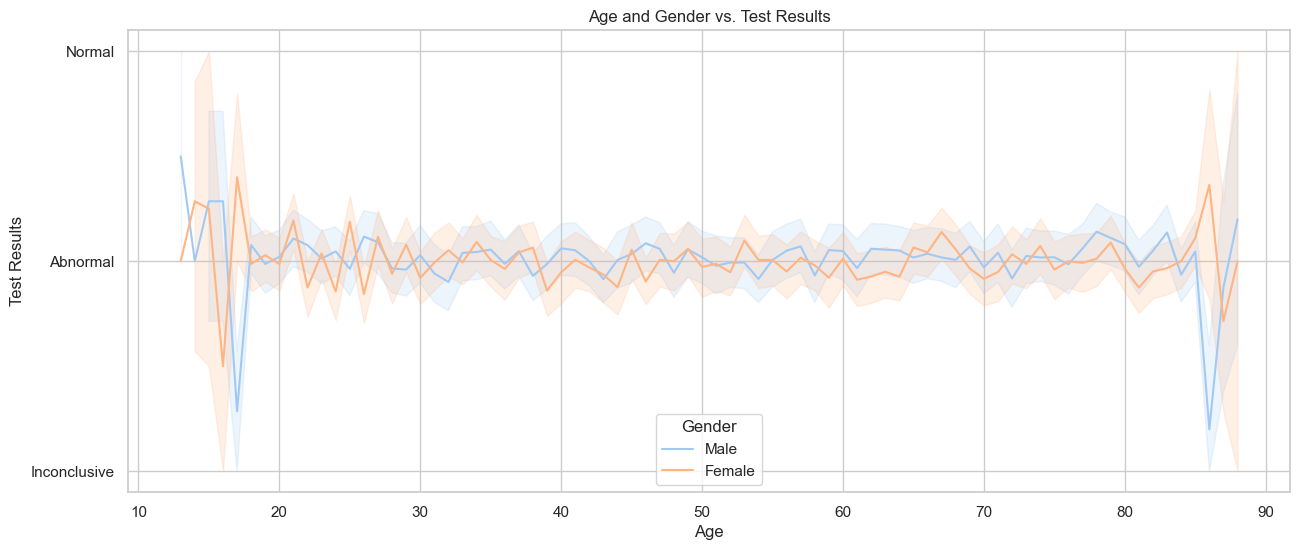

In [442]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Age', y='Test Results', hue='Gender', data=df_health, markers=True, dashes=False)
plt.title('Age and Gender vs. Test Results')
plt.xlabel('Age')
plt.ylabel('Test Results')
plt.legend(title='Gender')
plt.grid(True)
plt.show()
plt.savefig("Age and Gender vs. Test Results.png")

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 640x480 with 0 Axes>

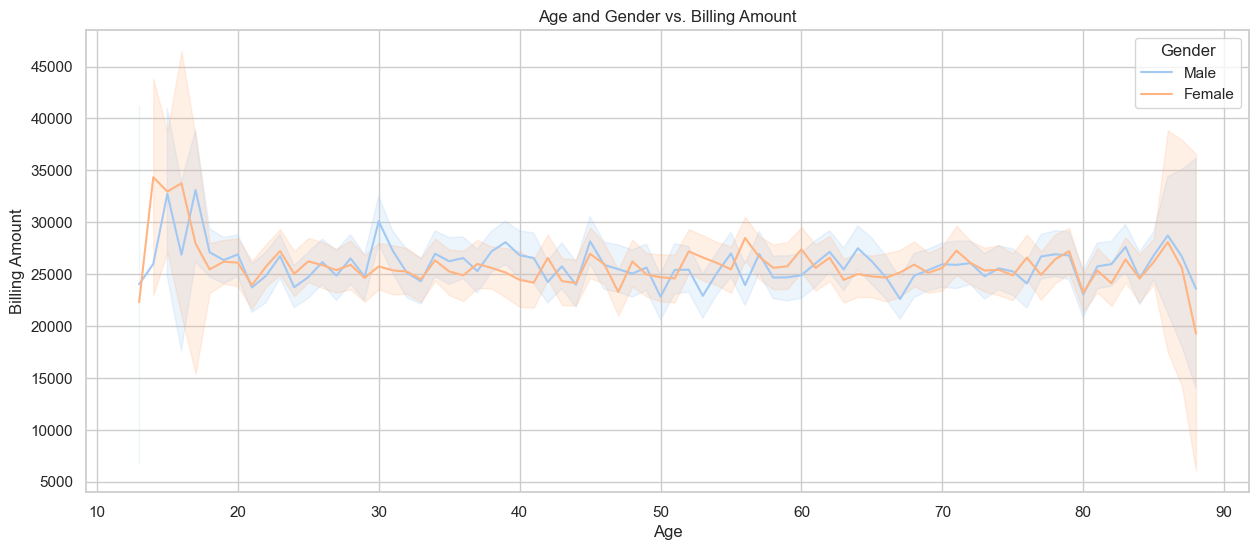

In [443]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Age', y='Billing Amount', hue='Gender', data=df_health)
plt.title('Age and Gender vs. Billing Amount')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.legend(title='Gender')
plt.grid(True)
plt.show()
plt.savefig("Age and Gender vs. Billing Amounts.png")

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

<Figure size 640x480 with 0 Axes>

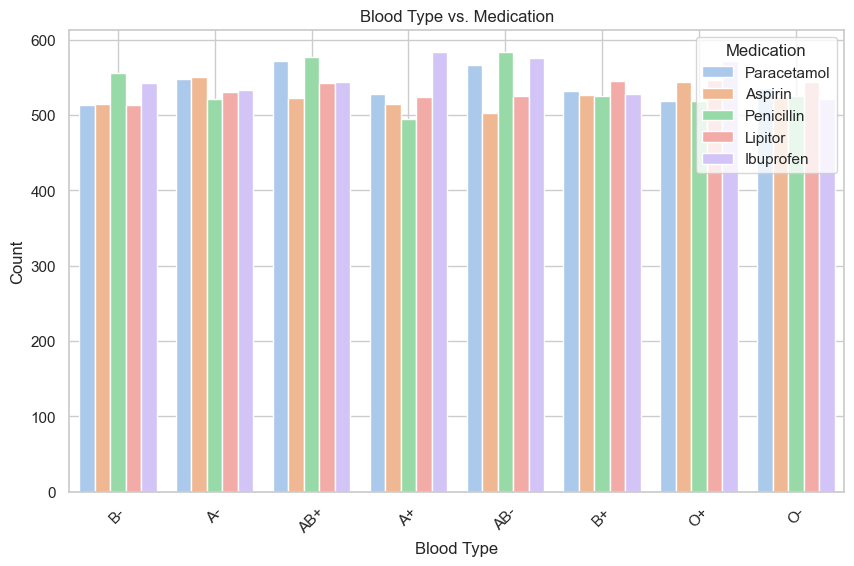

In [444]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Blood Type', hue='Medication', data=df_health, palette='pastel')
plt.title('Blood Type vs. Medication')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.legend(title='Medication')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig("Blood Type vs. Medication.png")

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\3674456760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Blood Type', y='Medical Condition', data=df_health, palette='Set3')


<Figure size 640x480 with 0 Axes>

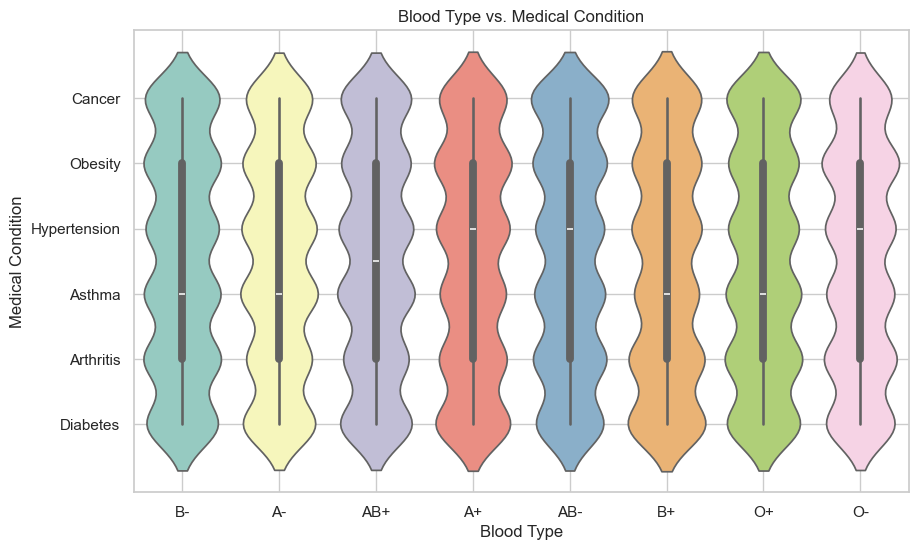

In [445]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Blood Type', y='Medical Condition', data=df_health, palette='Set3')
plt.title('Blood Type vs. Medical Condition')
plt.xlabel('Blood Type')
plt.ylabel('Medical Condition')
plt.grid(True)
plt.show()
plt.savefig("Blood Type vs Medical Condition.png")

    Age    Age Group
0    30  Young Adult
2    76       Senior
4    43        Adult
7    20  Young Adult
11   38        Adult


C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\3414421793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age Group', y='Stay Duration', data=df_health, palette='Set3')


<Figure size 640x480 with 0 Axes>

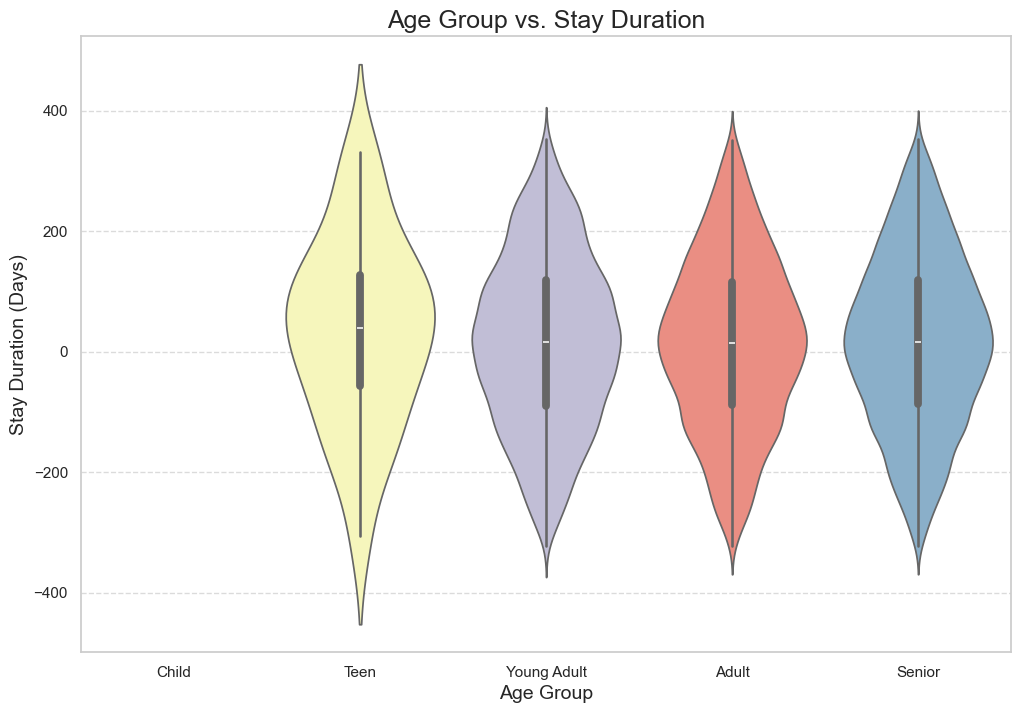

In [446]:
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_health['Age Group'] = pd.cut(df_health['Age'], bins=age_bins, labels=age_labels, right=False)

print(df_health[['Age', 'Age Group']].head())

sns.set(style="whitegrid", palette="Set3")

plt.figure(figsize=(12, 8))

sns.violinplot(x='Age Group', y='Stay Duration', data=df_health, palette='Set3')

plt.title('Age Group vs. Stay Duration', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Stay Duration (Days)', fontsize=14)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.savefig("Age Group vs Stay Duration.png")

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

<Figure size 640x480 with 0 Axes>

<Figure size 3500x600 with 0 Axes>

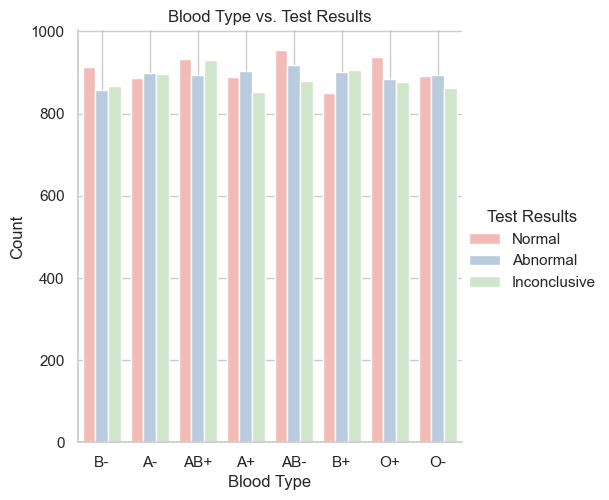

In [447]:
plt.figure(figsize=(35, 6))
sns.catplot(x='Blood Type', hue='Test Results', kind='count', data=df_health, palette='Pastel1')
plt.title('Blood Type vs. Test Results')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()
plt.savefig("Blood Type vs Test Results.png")

<Figure size 640x480 with 0 Axes>

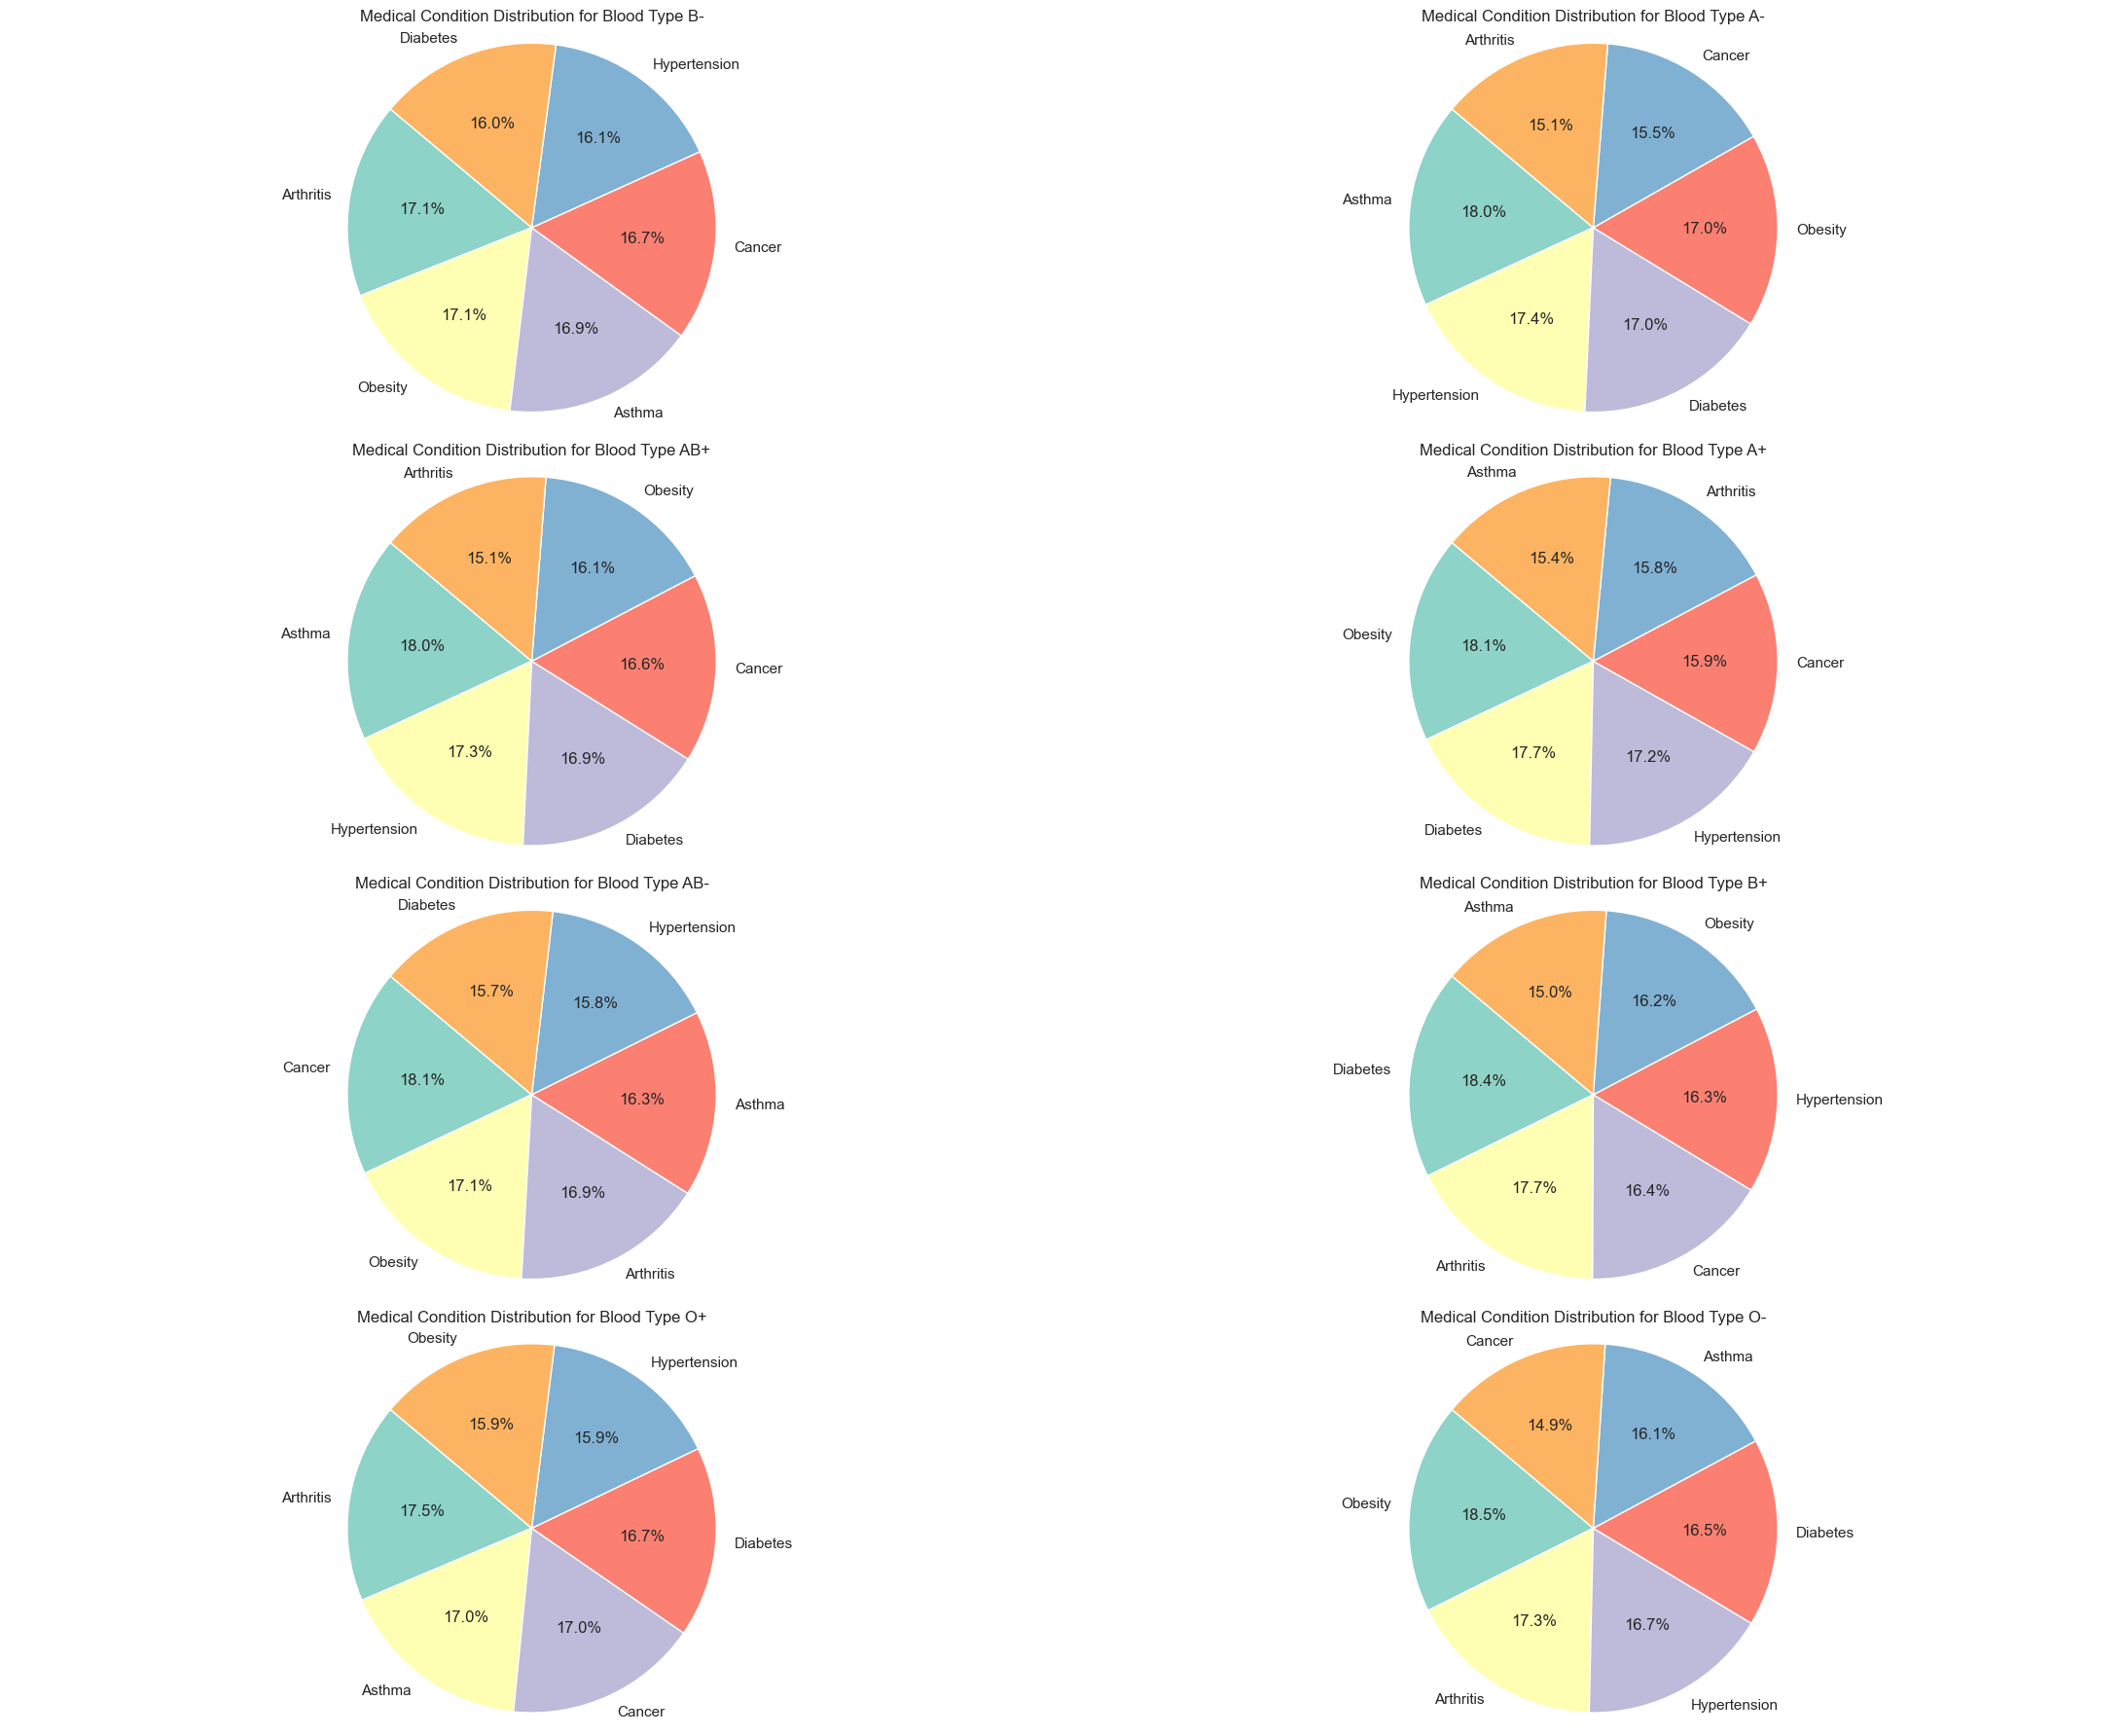

In [448]:
medical_condition_counts = df_health.groupby('Blood Type')['Medical Condition'].value_counts()

unique_blood_types = df_health['Blood Type'].unique()
num_blood_types = len(unique_blood_types)

num_cols = 2  
num_rows = (num_blood_types + num_cols - 1) // num_cols 

plt.figure(figsize=(22, 18))
for i, blood_type in enumerate(unique_blood_types):
    plt.subplot(num_rows, num_cols, i + 1)
    condition_counts = medical_condition_counts[blood_type]
    plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Medical Condition Distribution for Blood Type {blood_type}')
    plt.axis('equal') 

plt.tight_layout()
plt.show()
plt.savefig("BLood Group Vs Desease.png")

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

<Figure size 640x480 with 0 Axes>

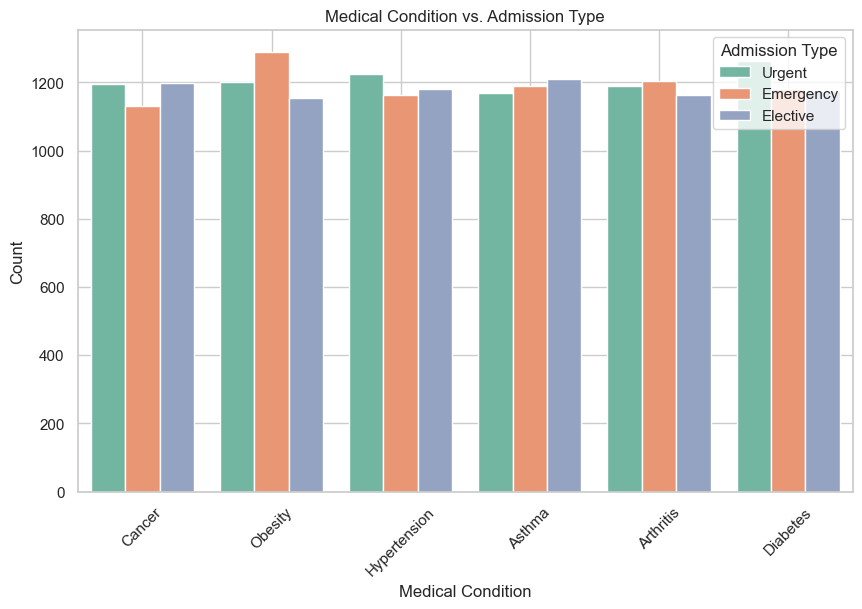

In [449]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medical Condition', hue='Admission Type', data=df_health, palette='Set2')
plt.title('Medical Condition vs. Admission Type')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Admission Type')
plt.grid(True)
plt.show()
plt.savefig("'Medical Condition vs. Admission Type.png")

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\948444459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medical Condition', y='Stay Duration', data=df_health, palette='Set3')
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

<Figure size 640x480 with 0 Axes>

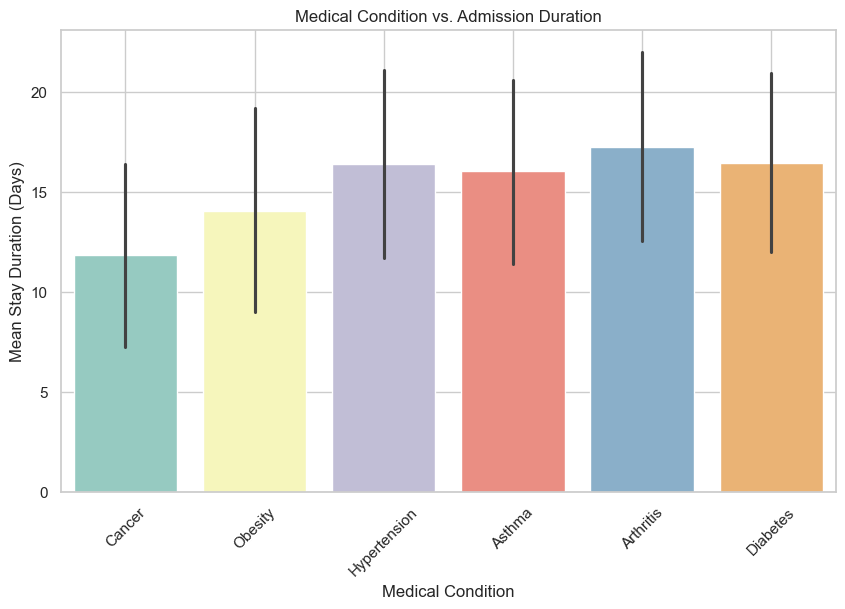

In [450]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Medical Condition', y='Stay Duration', data=df_health, palette='Set3')
plt.title('Medical Condition vs. Admission Duration')
plt.xlabel('Medical Condition')
plt.ylabel('Mean Stay Duration (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig("Medical Condition vs. Admission Duration.png")

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

<Figure size 640x480 with 0 Axes>

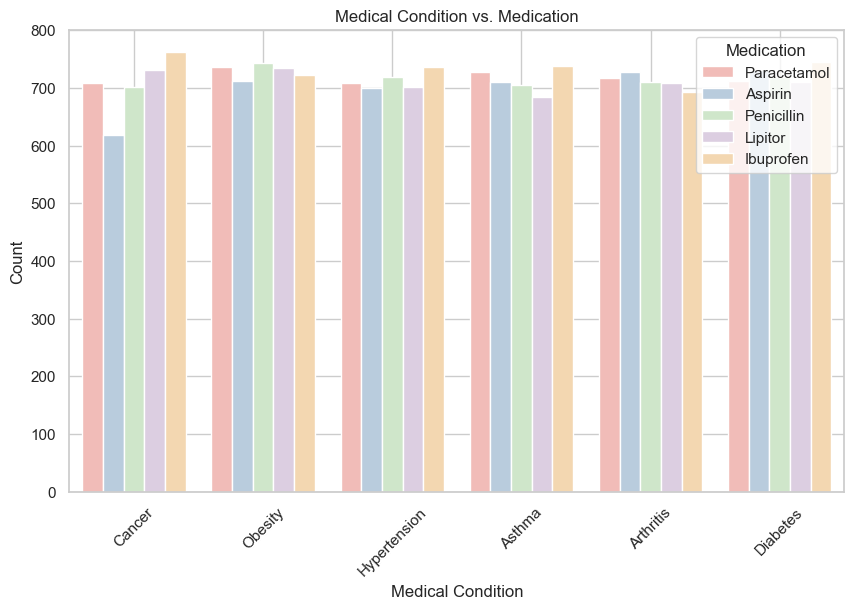

In [451]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medical Condition', hue='Medication', data=df_health, palette='Pastel1')
plt.title('Medical Condition vs. Medication')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Medication')
plt.grid(True)
plt.show()
plt.savefig("Medical Condition vs. Medication.png")

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

<Figure size 640x480 with 0 Axes>

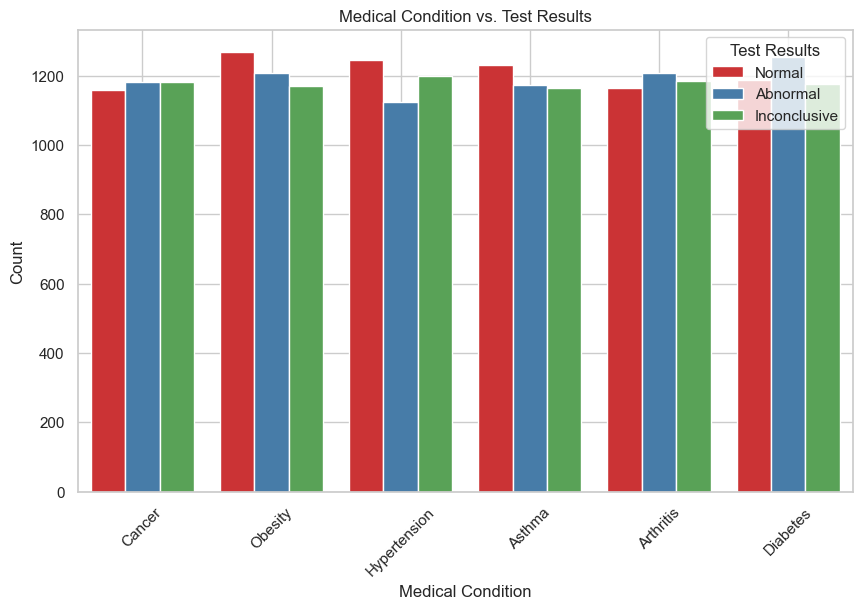

In [452]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medical Condition', hue='Test Results', data=df_health, palette='Set1')
plt.title('Medical Condition vs. Test Results')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Test Results')
plt.grid(True)
plt.show()
plt.savefig("'Medical Condition vs. Test Results'.png")

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\3818049625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medical Condition', y='Billing Amount', data=df_health, palette='Set2')
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Atharva\AppData\Local\Programs\Python\P

<Figure size 640x480 with 0 Axes>

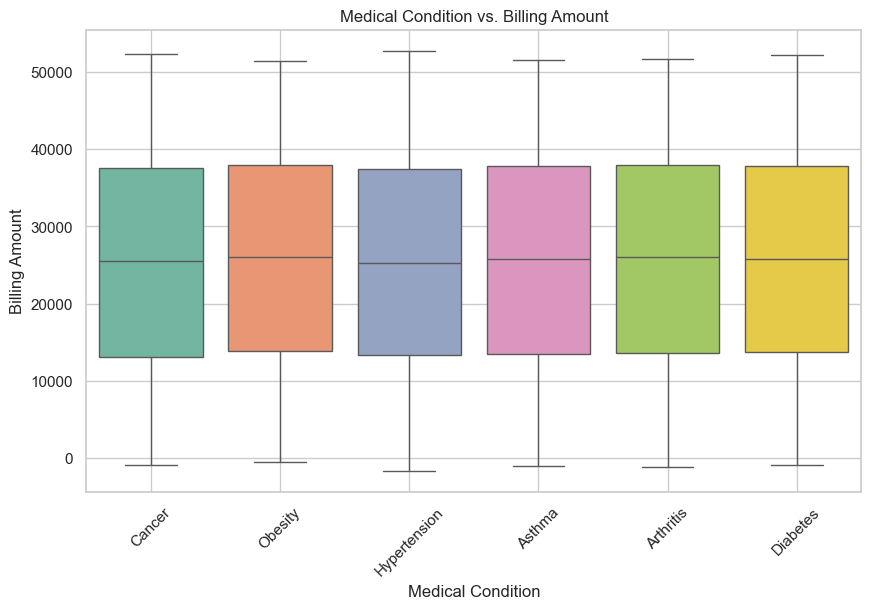

In [453]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df_health, palette='Set2')
plt.title('Medical Condition vs. Billing Amount')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig("Medical Condition vs. Billing Amount.png")

<Figure size 640x480 with 0 Axes>

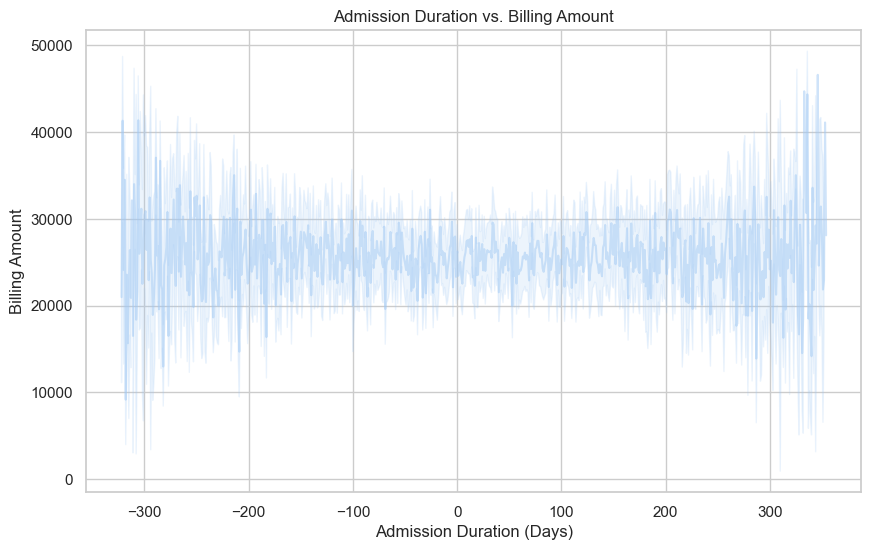

In [454]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Stay Duration', y='Billing Amount', data=df_health, color='b', alpha=0.5)
plt.title('Admission Duration vs. Billing Amount')
plt.xlabel('Admission Duration (Days)')
plt.ylabel('Billing Amount')
plt.grid(True)
plt.show()
plt.savefig("Admission Duration vs. Billing Amount.png")

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\925748015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Admission Type', y='Billing Amount', data=df_health, palette='Pastel1')
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_d

<Figure size 640x480 with 0 Axes>

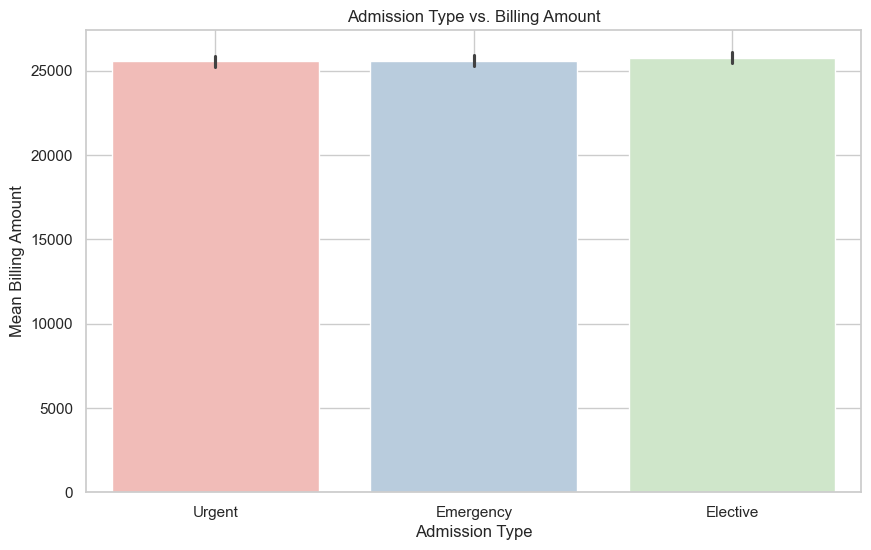

In [455]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Admission Type', y='Billing Amount', data=df_health, palette='Pastel1')
plt.title('Admission Type vs. Billing Amount')
plt.xlabel('Admission Type')
plt.ylabel('Mean Billing Amount')
plt.grid(True)
plt.show()
plt.savefig("Admission Type vs. Billing Amount.png")

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\3095721719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medication', y='Billing Amount', data=df_health, palette='Set3')
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Atharva\AppData\Local\Programs\Python\Python31

<Figure size 640x480 with 0 Axes>

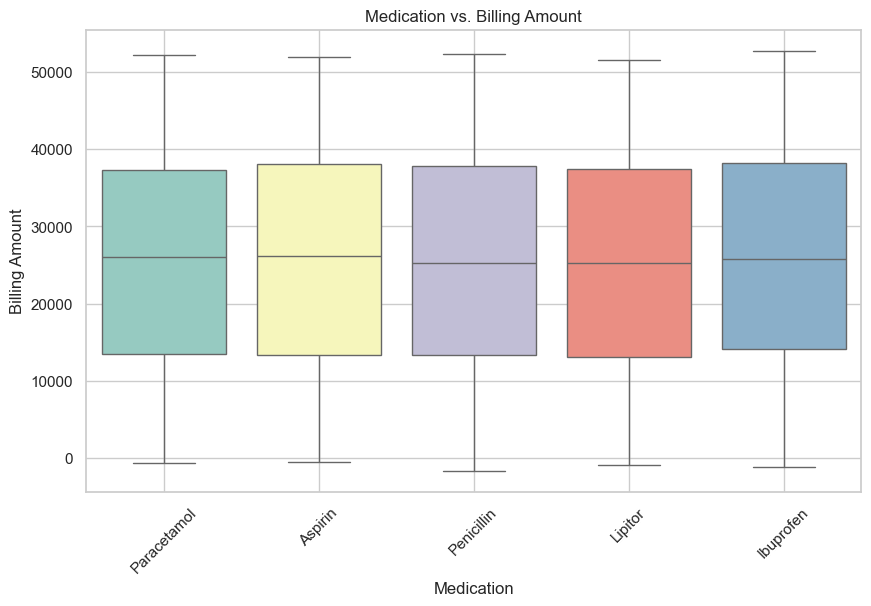

In [456]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medication', y='Billing Amount', data=df_health, palette='Set3')
plt.title('Medication vs. Billing Amount')
plt.xlabel('Medication')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig("Medication vs. Billing Amount.png")

C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

<Figure size 640x480 with 0 Axes>

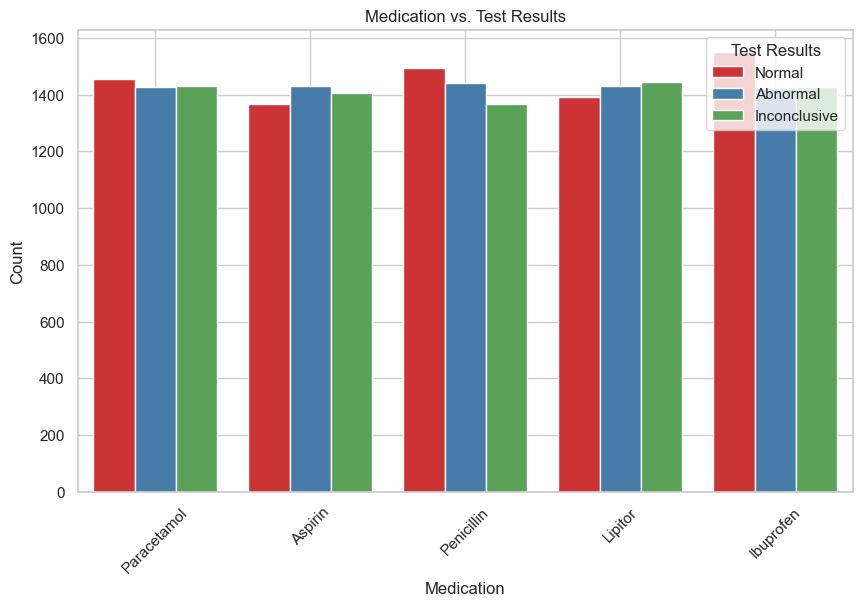

In [457]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medication', hue='Test Results', data=df_health, palette='Set1')
plt.title('Medication vs. Test Results')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Test Results')
plt.grid(True)
plt.show()
plt.savefig("Medication vs. Test Results.png")

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\2987648051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medication', y='Stay Duration', data=df_health, palette='Set3')
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312

<Figure size 640x480 with 0 Axes>

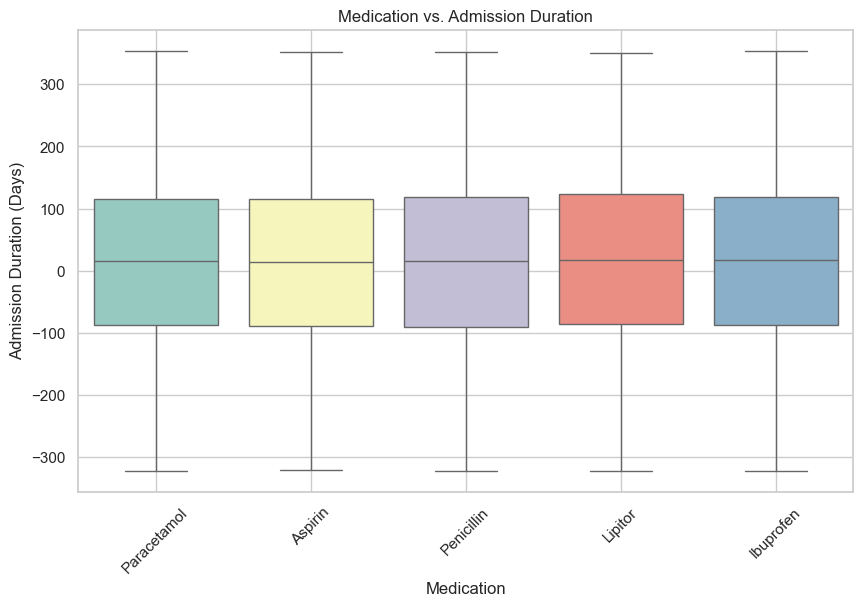

In [458]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medication', y='Stay Duration', data=df_health, palette='Set3')
plt.title('Medication vs. Admission Duration')
plt.xlabel('Medication')
plt.ylabel('Admission Duration (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig("'Medication vs. Admission Duration'.png")

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\2811366090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Admission Type', y='Stay Duration', data=df_health, palette='Set3')
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Atharva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Atharva\AppData\Local\Programs\Python\Pytho

<Figure size 640x480 with 0 Axes>

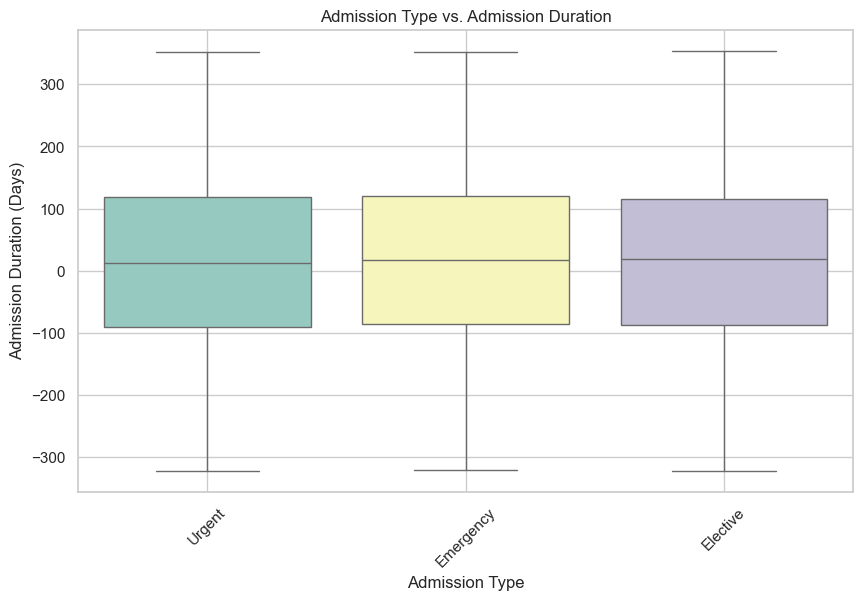

In [459]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type', y='Stay Duration', data=df_health, palette='Set3')
plt.title('Admission Type vs. Admission Duration')
plt.xlabel('Admission Type')
plt.ylabel('Admission Duration (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.savefig("Admission Type vs. Admission Duration.png")

<Figure size 640x480 with 0 Axes>

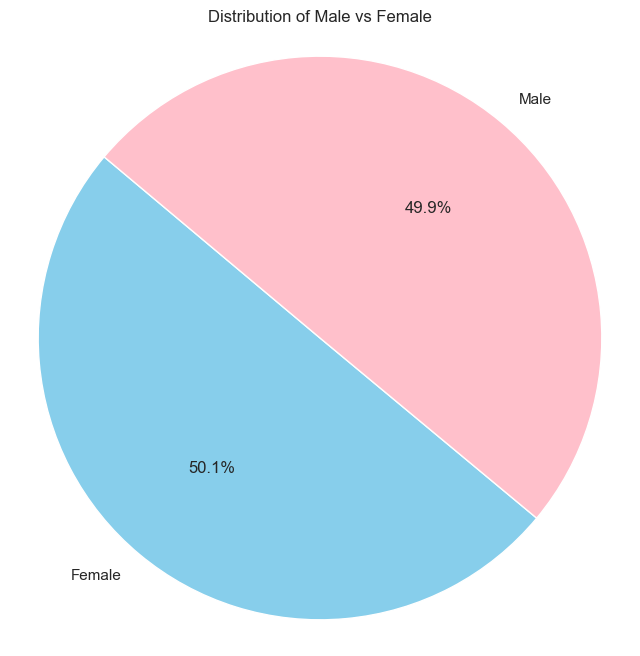

In [460]:
gender_counts = df_health['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Distribution of Male vs Female')
plt.axis('equal') 

plt.show()
plt.savefig("Distribution of Male vs Female.png")

<Figure size 640x480 with 0 Axes>

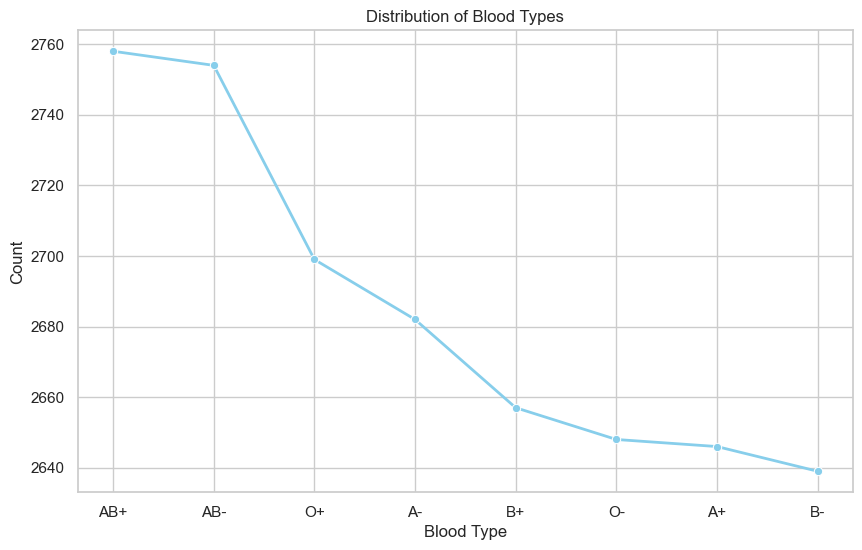

In [461]:
blood_type_counts = df_health['Blood Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(x=blood_type_counts.index, y=blood_type_counts.values, marker='o', color='skyblue', linewidth=2)
plt.title('Distribution of Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
plt.savefig("Distribution of Blood Types.png")

<Figure size 640x480 with 0 Axes>

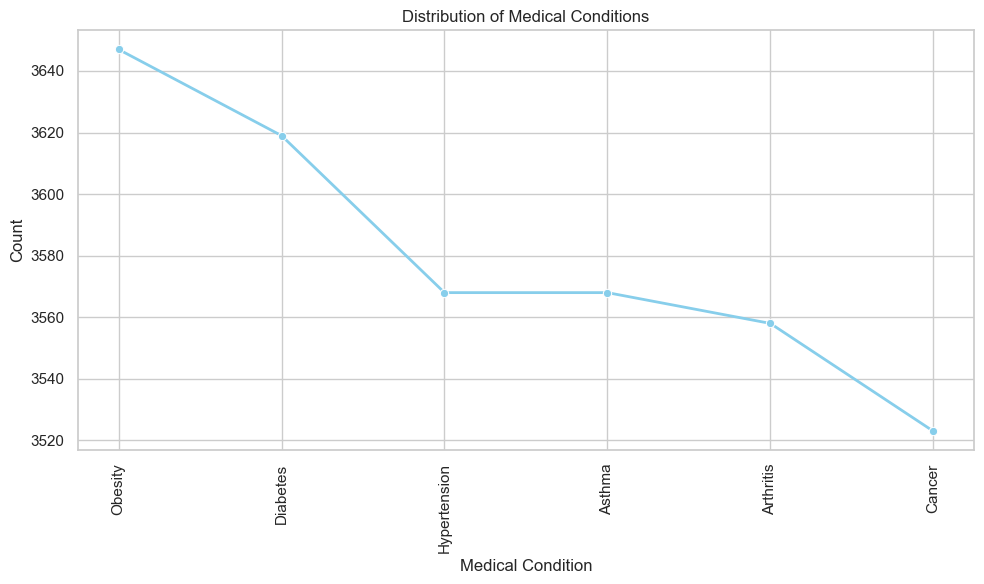

In [462]:
medical_condition_counts = df_health['Medical Condition'].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(x=medical_condition_counts.index, y=medical_condition_counts.values, marker='o', color='skyblue', linewidth=2)
plt.title('Distribution of Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Distribution of Medical Conditions.png")

<Figure size 640x480 with 0 Axes>

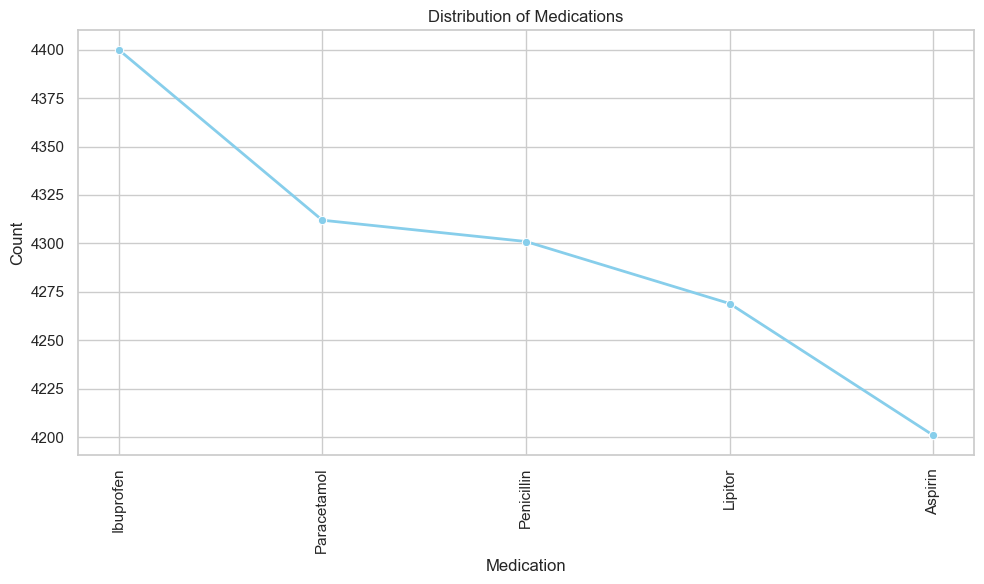

In [463]:
medication_counts = df_health['Medication'].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(x=medication_counts.index, y=medication_counts.values, marker='o', color='skyblue', linewidth=2)
plt.title('Distribution of Medications')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Distribution of Medications.png")

<Figure size 640x480 with 0 Axes>

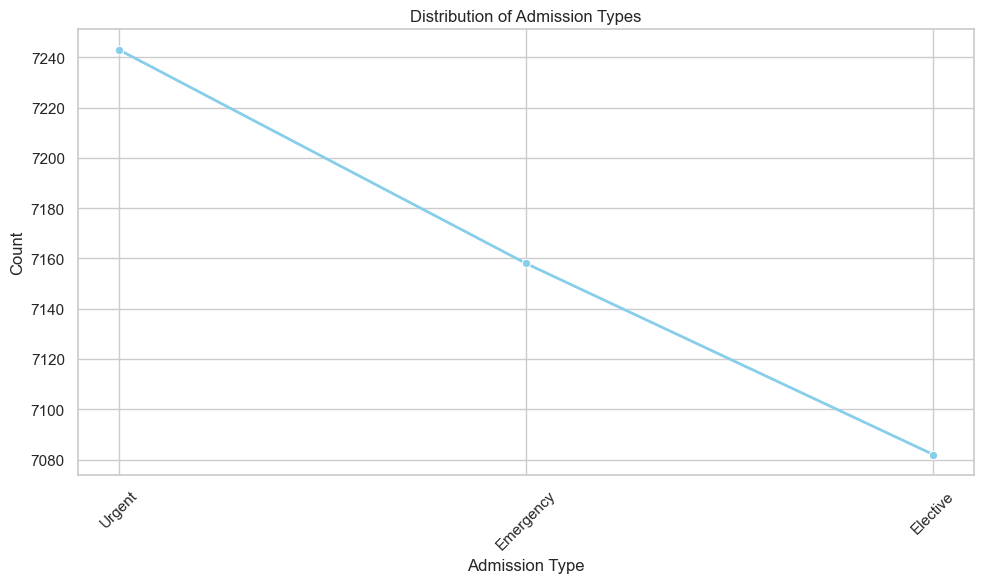

In [464]:
admission_type_counts = df_health['Admission Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(x=admission_type_counts.index, y=admission_type_counts.values, marker='o', color='skyblue', linewidth=2)
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("Distribution of Admission Types.png")

# Model Building

In [465]:
df=pd.read_csv('healthcare_dataset.csv')

In [466]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02-02-2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07-10-2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18-12-2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09-10-2022,Penicillin,Abnormal


In [467]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%d-%m-%Y')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d-%m-%Y')

df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

df = df_health[df['Length of Stay'] > 0]

df = df.dropna()

C:\Users\Atharva\AppData\Local\Temp\ipykernel_11428\2359211709.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_health[df['Length of Stay'] > 0]
